<a href="https://colab.research.google.com/github/ViniciusNarcisoFernandes/hydrogen-atom/blob/main/%C3%81tomo_de_Hidrog%C3%AAnio_M%C3%A9todo_de_Numerov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ponto = [-13.60586451]


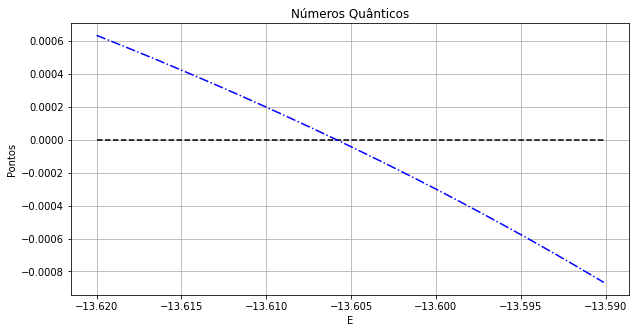

In [ ]:
# Átomo de Hidrogênio: Range de Energia

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Massa do elétron (kg):
m_e = 9.10938*10**(-31)

# Carga elétrica ([C]):
e = 1.60218*10**(-19)

# Permissividade do vácuo ([C]^(2).[eV.A]^(-1)):
eps0 = 1.4186*10**(-40)

# hcortado([ev].[s]):
hbar = 6.58209*10**(-16)

# Valor de N:
N = 10000

# Número quântico azimutal:
l = 0

# listas:
Res1 = list() ; Res2 = list()

def atom_left(l,N,E):

  # Valor inicial de raio:
  ri = 0.00001 ; rf = 2.5

  # Número de onda:
  k = np.sqrt(2*m_e*(-E)/((16.0217663)*np.power(hbar,2)))

  # Substituição u(rho):
  rhoi = ri*k
  rhof = rf*k

  # Substituição:
  h1 = (rhof-rhoi)/N
  b1 = np.power(h1,2)/12

  # Valor de rho0:
  rho0 = (m_e*np.power(e,2)/(2*np.pi*eps0*np.power(hbar,2)*k))/(16.0217663)

  # Valor de kl:
  kl = np.zeros([N])
  kl[0] = -1 + (rho0/rhoi) - (l*(l+1))/np.power(rhoi,2)
  kl[1] = -1 + (rho0/(rhoi+h1)) - (l*(l+1))/np.power((rhoi+h1),2)

  # Solução ul(rho):
  ul = np.zeros([N])
  ul[0] = np.power(rhoi,(l+1))
  ul[1] = np.power((rhoi+h1),(l+1))

  # Numerov:
  for n in range(1,N-1):
    kl[n+1] = -1 + (rho0/(rhoi+((n+1)*h1))) - ((l*(l+1))/np.power((rhoi+((n+1)*h1)),2))
    ul[n+1] = ((2*(1-5*b1*kl[n])*ul[n]) - ((1+(b1*kl[n-1]))*ul[n-1]))/(1+(b1*kl[n+1]))
  return ul,h1

def atom_right(l,N,E):

  # Valor inicial do raio:
  ri = 5 ; rf = 2.5

  # Número de onda:
  k = np.sqrt(2*m_e*(-E)/((16.0217663)*np.power(hbar,2)))

  # Substituição u(rho):
  rhoi = ri*k
  rhof = rf*k

  # Substituição:
  h2 = (rhoi-rhof)/N
  b2 = np.power(h2,2)/12

  # Valor de rho0:
  rho0 = (m_e*np.power(e,2)/(2*np.pi*eps0*np.power(hbar,2)*k))/(16.0217663)

  # Valor de kr:
  kr = np.zeros([N])
  kr[0] = -1 + (rho0/rhoi) - (l*(l+1))/np.power(rhoi,2)
  kr[1] = -1 + (rho0/rhoi) - (l*(l+1))/np.power((rhoi-h2),2)

  # Solução ur(rho):
  ur = np.zeros([N])
  ur[0] = np.exp(-rhoi)
  ur[1] = np.exp(-(rhoi-h2))

  # Numerov:
  for n in range(1,N-1):
    kr[n+1] = -1 + (rho0/(rhoi-((n+1)*h2))) - ((l*(l+1))/np.power((rhoi-((n+1)*h2)),2))
    ur[n+1] = ((2*(1-(5*b2*kr[n]))*ur[n]) - ((1+(b2*kr[n-1]))*ur[n-1]))/(1+(b2*kr[n+1]))
  return ur,h2

def energy(l):
  # Range de energia:
  for i in np.arange(-13.62,-13.59,0.0001):
    E = i
    # Numerov left:
    Numl,h1 = atom_left(l,N,E)
    for i,j in enumerate(Numl):
      if (i == len(Numl)-1):
        l1 = j
      elif (i == len(Numl)-2):
        l2 = j
      elif (i == len(Numl)-3):
        l3 = j

    # Derivada left:
    left = ((1/2*l3) - (2*l2) + (3/2*l1))/h1

    # Numerov right:
    Numr,h2 = atom_right(l,N,E)
    for i,j in enumerate(Numr):
      if (i == len(Numr)-1):
        r1 = j
      elif (i == len(Numr)-2):
        r2 = j
      elif (i == len(Numr)-3):
        r3 = j

    # Derivada right:
    right = ((-1/2*r3) + (2*r2) + (-3/2*r1))/h2

    # Fator:
    f = l1/r1
    # Subtração dos últimos resultados:
    R1 = l1/f - r1
    Res1.append(R1)
    # Derivada:
    R2 = left/f - right
    Res2.append(R2)
  return Res1,Res2

# Valores:
def energy2(E):
    # Numerov left:
    Numl,h1 = atom_left(l,N,E)
    for i,j in enumerate(Numl):
      if (i == len(Numl)-1):
        l1 = j
      elif (i == len(Numl)-2):
        l2 = j
      elif (i == len(Numl)-3):
        l3 = j

    # Derivada left:
    left = ((1/2*l3) - (2*l2) + (3/2*l1))/h1

    # Numerov right:
    Numr,h2 = atom_right(l,N,E)
    for i,j in enumerate(Numr):
      if (i == len(Numr)-1):
        r1 = j
      elif (i == len(Numr)-2):
        r2 = j
      elif (i == len(Numr)-3):
        r3 = j

    # Derivada right:
    right = ((-1/2*l3) + (2*l2) - (3/2*l1))/h2

    # Fator:
    f = l1/r1
    # Subtração dos últimos resultados:
    R1 = l1/f - r1
    # Derivada:
    R2 = left/f - right
    return R2

# Função:
Res11,Res22 = energy(l)

# Valor esperado:
print('Ponto =',opt.fsolve(energy2,-13.61))

# Plot:
plt.figure(figsize=(10,5))
plt.plot(np.arange(-13.62,-13.59,0.0001),Res11,color='Black',linestyle='--')
plt.plot(np.arange(-13.62,-13.59,0.0001),Res22,color='Blue',linestyle='-.')
plt.title('Números Quânticos')
plt.xlabel('E')
plt.ylabel('Pontos')
plt.grid(True)
plt.show()

In [ ]:
# Range de energia para testar
(-13.62,-13.59,0.0001)
(-3.45,-3.35,0.001)
(-1.6,-1.4,0.001)

C10 = 4270.728259159395


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


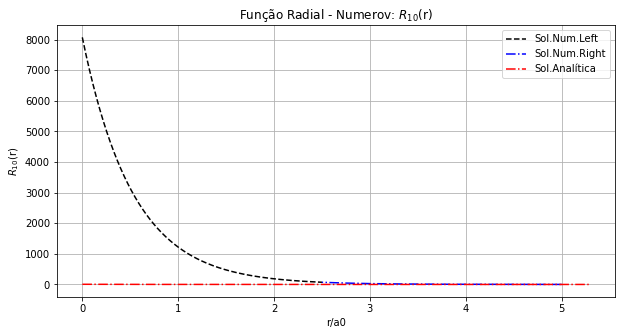

In [ ]:
# Gráfico para n = 1, l = 0
import numpy as np

# Massa do elétron (kg):
m_e = 9.10938*10**(-31)

# Carga elétrica ([C]^2):
e = 1.60218*10**(-19)

# Permissividade do vácuo ([C]^(2).[eV]^(-1).[A]^(-1)):
eps0 = 1.4186*10**(-40)

# hcortado([ev].[s]):
hbar = 6.58209*10**(-16)

# Raio de Bohr:
a0 = (4*np.pi*eps0*np.power(hbar,2))*(16.0218)/(m_e*np.power(e,2))

# Energia:
E1 = -13.60586451

# Valor de r:
rl = np.linspace(0.00001,2.5,10000)
rr = np.linspace(5,2.5,10000)

# Função:
Numl,h1 = atom_left(l,N,E1)
Numr,h2 = atom_right(l,N,E1)

# Raio:
rho = np.linspace(0.0,10,10000)

# Solução analítica:
R10 = (2/(np.sqrt(a0)))*rho*np.exp(-rho)

# Constante de Normalização:
NUMM = np.power((Numl*Numr),2)
NUMM2 = np.trapz(NUMM,np.linspace(0.00001,5,10000))
C10 = 1/np.sqrt(NUMM2*a0)
print('C10 =',C10)

# Plot:
plt.figure(figsize=(10,5))
plt.plot(rl,C10*(Numl/rl),color='Black',linestyle='--',label='Sol.Num.Left')
plt.plot(rr,(C10*(Numr*Numl[N-1]/Numr[N-1]))/rr,color='Blue',linestyle='-.',label='Sol.Num.Right')
plt.plot(rho*a0,R10/(rho*a0),color='Red',linestyle='-.',label='Sol.Analítica')
plt.title('Função Radial - Numerov: $R_{10}$(r)')
plt.xlabel('r/a0')
plt.ylabel('$R_{10}$(r)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in true_divide


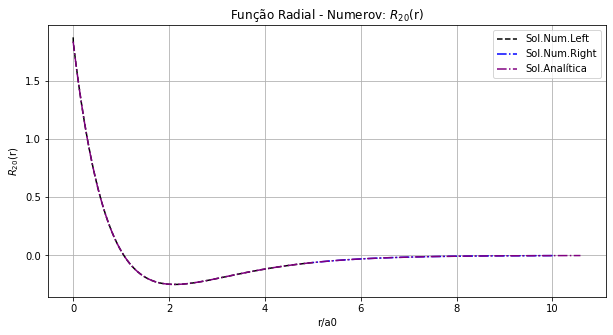

In [ ]:
# Gráfico para n = 2 , l = 0
import numpy as np

# Massa do elétron (kg):
m_e = 9.10938*10**(-31)

# Carga elétrica ([C]^2):
e = 1.60218*10**(-19)

# Permissividade do vácuo ([C]^(2).[eV]^(-1).[A]^(-1)):
eps0 = 1.4186*10**(-40)

# hcortado([ev].[s]):
hbar = 6.58209*10**(-16)

# Raio de Bohr:
a0 = (4*np.pi*eps0*np.power(hbar,2))*(16.0218)/(m_e*np.power(e,2))

# Energia:
E2 = -3.40132598

# Função:
Numl,h1 = atom_left(l,N,E2)
Numr,h2 = atom_right(l,N,E2)

# Valor de r:
rl = np.linspace(0.00000,5,10000)
rr = np.linspace(10,5,10000)

# Raio:
rho = np.linspace(0.00001,10,10000)

# Solução analítica:
R20 = 2/np.sqrt(2*a0)*(rho-np.power(rho,2))*np.exp(-rho)

# Constante de Normalização:
C20 = 2/np.sqrt(2*a0)

# Plot:
plt.figure(figsize=(10,5))
plt.plot(rl,C20*(Numl)/rl,color='Black',linestyle='--',label='Sol.Num.Left')
plt.plot(rr,(C20*(Numr*Numl[N-1]/Numr[N-1]))/rr,color='Blue',linestyle='-.',label='Sol.Num.Right')
plt.plot((2*a0*rho),R20/(2*a0*rho),color='Purple',linestyle='-.',label='Sol.Analítica')
plt.title('Função Radial - Numerov: $R_{20}$(r)')
plt.xlabel('r/a0')
plt.ylabel('$R_{20}$(r)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

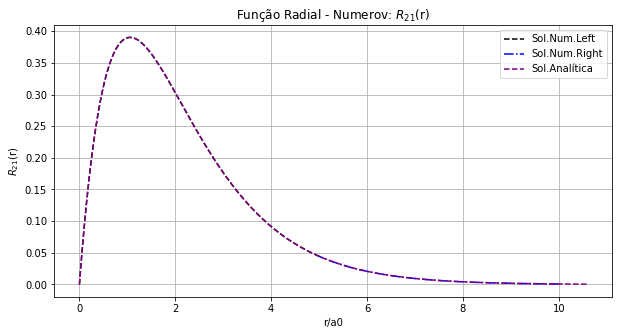

In [ ]:
# Gráfico para n = 2 , l = 1
import numpy as np

# Massa do elétron (kg):
m_e = 9.10938*10**(-31)

# Carga elétrica ([C]^2):
e = 1.60218*10**(-19)

# Permissividade do vácuo ([C]^(2).[eV]^(-1).[A]^(-1)):
eps0 = 1.4186*10**(-40)

# hcortado([ev].[s]):
hbar = 6.58209*10**(-16)

# Raio de Bohr:
a0 = (4*np.pi*eps0*np.power(hbar,2))*(16.0218)/(m_e*np.power(e,2))

# Valor de r:
rl = np.linspace(0.00001,5,10000)
rr = np.linspace(10,5,10000)

# Energia:
E2 = -3.40141112

# Função:
Numl,h1 = atom_left(l,N,E2)
Numr,h2 = atom_right(l,N,E2)

# Raio:
rho = np.linspace(0.00001,10,10000)

# Solução analítica:
R21 = (2/np.sqrt(6*a0))*np.power(rho,2)*np.exp(-rho)

# Constante de Normalização:
C21 = (2/np.sqrt(6*a0))

# Plot:
plt.figure(figsize=(10,5))
plt.plot(rl,(C21*Numl)/rl,color='Black',linestyle='--',label='Sol.Num.Left')
plt.plot(rr,(C21*(Numr*Numl[N-1]/Numr[N-1]))/rr,color='Blue',linestyle='-.',label='Sol.Num.Right')
plt.plot((2*a0*rho),R21/(2*a0*rho),color='Purple',linestyle='--',label='Sol.Analítica')
plt.title('Função Radial - Numerov: $R_{21}$(r)')
plt.xlabel('r/a0')
plt.ylabel('$R_{21}$(r)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

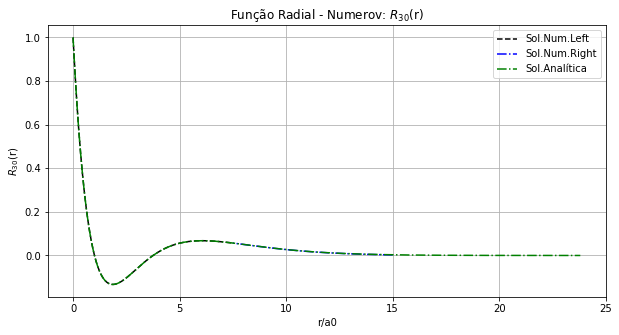

In [ ]:
# Gráfico para n = 3 , l = 0
import numpy as np

# Massa do elétron (kg):
m_e = 9.10938*10**(-31)

# Carga elétrica ([C]^2):
e = 1.60218*10**(-19)

# Permissividade do vácuo ([C]^(2).[eV]^(-1).[A]^(-1)):
eps0 = 1.4186*10**(-40)

# hcortado([ev].[s]):
hbar = 6.58209*10**(-16)

# Raio de Bohr:
a0 = (4*np.pi*eps0*np.power(hbar,2))*(16.0218)/(m_e*np.power(e,2))

# Energia:
E3 = -1.51002361

# Valor de r:
rl = np.linspace(0.00001,7.5,10000)
rr = np.linspace(15,7.5,10000)

# Função:
Numl,h1 = atom_left(l,N,E3)
Numr,h2 = atom_right(l,N,E3)

# Valor de r:
rho = np.linspace(0.00001,15,10000)

# Solução analítica:
R30 = (2/(np.sqrt(3*a0)))*(rho-2*np.power(rho,2)+(2/3)*np.power(rho,3))*np.exp(-rho)

# Constante de Normalização:
C30 = 2/(np.sqrt(3*a0))

# Plot:
plt.figure(figsize=(10,5))
plt.plot(rl,(C30*Numl)/rl,color='Black',linestyle='--',label='Sol.Num.Left')
plt.plot(rr,(C30*(Numr*Numl[N-1]/Numr[N-1]))/rr,color='Blue',linestyle='-.',label='Sol.Num.Right')
plt.plot((rho*3*a0),R30/(3*a0*rho),color='Green',linestyle='-.',label='Sol.Analítica')
plt.title('Função Radial - Numerov: $R_{30}$(r)')
plt.xlabel('r/a0')
plt.ylabel('$R_{30}$(r)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

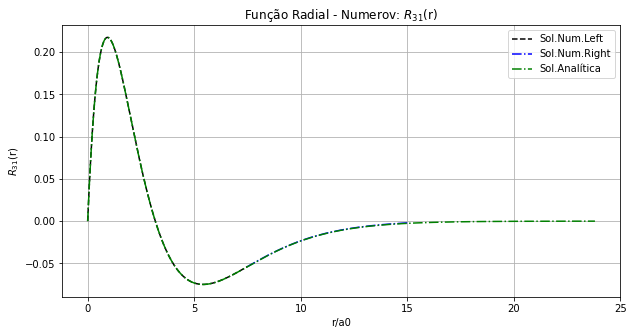

In [ ]:
# Gráfico para n = 3 , l = 1
import numpy as np

# Massa do elétron (kg):
m_e = 9.10938*10**(-31)

# Carga elétrica ([C]^2):
e = 1.60218*10**(-19)

# Permissividade do vácuo ([C]^(2).[eV]^(-1).[A]^(-1)):
eps0 = 1.4186*10**(-40)

# hcortado([ev].[s]):
hbar = 6.58209*10**(-16)

# Raio de Bohr:
a0 = (4*np.pi*eps0*np.power(hbar,2))*(16.0218)/(m_e*np.power(e,2))

# Energia:
E3 = -1.51067863

# Função:
Numl,h1 = atom_left(l,N,E3)
Numr,h2 = atom_right(l,N,E3)

# Valor de r:
rl = np.linspace(0.00001,7.5,10000)
rr = np.linspace(15,7.5,10000)

# Valor de r:
rho = np.linspace(0.00001,15,10000)

# Solução Analítica:
R31 = 8/(3*np.sqrt(6*a0))*(np.power(rho,2)-np.power(rho,3)/2)*np.exp(-rho)

# Constante de Normalização:
C31 = 8/(3*np.sqrt(6*a0))

# Plot:
plt.figure(figsize=(10,5))
plt.plot(rl,(C31*Numl)/rl,color='Black',linestyle='--',label='Sol.Num.Left')
plt.plot(rr,(C31*(Numr*Numl[N-1]/Numr[N-1]))/rr,color='Blue',linestyle='-.',label='Sol.Num.Right')
plt.plot((rho*3*a0),R31/(3*a0*rho),color='Green',linestyle='-.',label='Sol.Analítica')
plt.title('Função Radial - Numerov: $R_{31}$(r)')
plt.xlabel('r/a0')
plt.ylabel('$R_{31}$(r)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

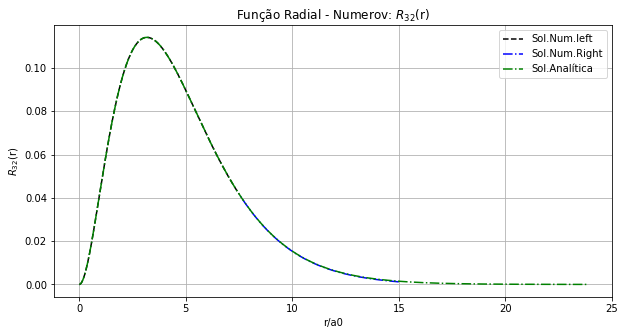

In [ ]:
# Gráfico para n = 3 , l = 2
import numpy as np

# Massa do elétron (kg):
m_e = 9.10938*10**(-31)

# Carga elétrica ([C]^2):
e = 1.60218*10**(-19)

# Permissividade do vácuo ([C]^(2).[eV]^(-1).[A]^(-1)):
eps0 = 1.4186*10**(-40)

# hcortado([ev].[s]):
hbar = 6.58209*10**(-16)

# Raio de Bohr:
a0 = (4*np.pi*eps0*np.power(hbar,2))*(16.0218)/(m_e*np.power(e,2))

# Energia:
E3 = -1.51142982

# Função:
Numl,h1 = atom_left(l,N,E3)
Numr,h2 = atom_right(l,N,E3)

# Valor de r:
rl = np.linspace(0.00001,7.5,10000)
rr = np.linspace(15,7.5,10000)

# Valor de rho:
rho = np.linspace(0.00001,15,10000)

# Solução Analítica:
R32 = (4/(np.sqrt(270*a0)))*np.power(rho,3)*np.exp(-rho)

# Constante de Normalização:
C32 = 4/(np.sqrt(270*a0))

# Plot:
plt.figure(figsize=(10,5))
plt.plot(rl,(C32*Numl)/rl,color='Black',linestyle='--',label='Sol.Num.left')
plt.plot(rr,(C32*(Numr*Numl[N-1]/Numr[N-1]))/rr,color='Blue',linestyle='-.',label='Sol.Num.Right')
plt.plot((rho*3*a0),R32/(3*a0*rho),color='Green',linestyle='-.',label='Sol.Analítica')
plt.title('Função Radial - Numerov: $R_{32}$(r)')
plt.xlabel('r/a0')
plt.ylabel('$R_{32}$(r)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()